In [197]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import time
from bs4 import BeautifulSoup
import requests
import re

# Welcome to the Jungle

## Sélénium

### Analyse de la page

In [5]:
metier ='data analyst'
metier = metier.lower().replace(" ","+")
url = f'https://www.welcometothejungle.com/fr/jobs?page=1&groupBy=job&sortBy=mostRelevant&query={metier}'

In [6]:
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_4653/907396872.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [227]:
print(int(driver.find_elements(By.CLASS_NAME,'ecRJuy')[0].text)) ## nombre d'offres 
print(int(len(driver.find_elements(By.CLASS_NAME,'dkmXvv')))) # nombre d'offres par pages

973
30


In [ ]:
driver.find_element(By.ID, "axeptio_btn_acceptAll").text #cookies

In [301]:
driver.find_elements(By.CLASS_NAME,'ais-Pagination-link')[-1].text

''

In [228]:
nb_offres = int(driver.find_elements(By.CLASS_NAME,'ecRJuy')[0].text)
nb_offres_per_pages = int(len(driver.find_elements(By.CLASS_NAME,'dkmXvv')))
loop = nb_offres // nb_offres_per_pages
loop

32

In [201]:
data = driver.find_elements(By.CLASS_NAME,'dkmXvv')
data_list = []
print(len(data))
for i in range(len(data)):
    data_list.append(data[i].text)
data_list[:5]

30


['Thales\nData analyst confirmé(e) (H/F)\nCDI\nVélizy-Villacoublay\nil y a 13 jours',
 'Veepee\nData Analyst (Data team)\nCDI\nSaint-Denis\nTélétravail partiel possible\nil y a 28 jours',
 'talent.io\nData Analyst (m/f/d)\nCDI\nParis\nTélétravail total possible\nil y a 5 jours',
 '360 medics\nData Analyst - Lyon ou Paris\nCDI\nParis\nTélétravail partiel possible\nhier',
 'Lydia\nData Analyst Intern\nCDI\nParis\nil y a 28 jours']

In [208]:
a = driver.find_elements(By.XPATH,"//header/div/a[@href]")
print(len(a))
a[0].get_attribute("href")

30


'https://www.welcometothejungle.com/fr/companies/thales/jobs/data-analyst-confirme-h-f_velizy-villacoublay_THALE_PleR6Dk?q=4d10f73adbfd3f9d16e8140646c15ae2&o=993285'

In [210]:
df = pd.DataFrame(data_list)
df.loc[:,0].str.split("\n",expand=True).head()

,0,1,2,3,4,5
0,Thales,Data analyst confirmé(e) (H/F),CDI,Vélizy-Villacoublay,il y a 13 jours,None
1,Veepee,Data Analyst (Data team),CDI,Saint-Denis,Télétravail partiel possible,il y a 28 jours
2,talent.io,Data Analyst (m/f/d),CDI,Paris,Télétravail total possible,il y a 5 jours
3,360 medics,Data Analyst - Lyon ou Paris,CDI,Paris,Télétravail partiel possible,hier
4,Lydia,Data Analyst Intern,CDI,Paris,il y a 28 jours,None


In [247]:
url = "https://www.welcometothejungle.com/fr/jobs?page=1&groupBy=job&sortBy=mostRecent&query=data%20analyst&aroundQuery=Bordeaux%2C%20France&aroundLatLng=44.8367%2C-0.58105&aroundRadius=20000"
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/3742673795.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [236]:
# nombre d'offres total de la page
driver.find_elements(By.CLASS_NAME,'ecRJuy')[0].text

'34'

In [237]:
companies = driver.find_elements(By.CLASS_NAME,'jHFSmB')
print(len(companies))
for i in range(5):
    print(companies[i].text)

30
Ultra Premium Direct
Lydia
Madeinvote
iD Systemes
Back Market


In [238]:
jobs = driver.find_elements(By.CLASS_NAME,'ineDNW')
print(len(jobs))
for i in range(5):
    print(jobs[i].text)

30
Data Analyst / Business Analyst E-commerce (H/F)
Data Analyst
Data analyst (CDI)
Chef de projet BI H/F
Business Data Analyst Intern (Customer Experience)


In [239]:
page=1
driver.find_element(By.LINK_TEXT, str(page+1)).text

'2'

In [240]:
a = driver.find_elements(By.XPATH,"//header/div/a[@href]")
a[0].get_attribute("href")

'https://www.welcometothejungle.com/fr/companies/ultra-premium-direct/jobs/data-analyst-business-analyst-e-commerce-h-f_bordeaux?q=656676c683241885a071e178f4749718&o=1343985'

In [241]:
driver.find_element(By.ID, "axeptio_btn_acceptAll").text #cookies

''

'›'

In [243]:
list_df_clean=[]
test = driver.find_elements(By.CLASS_NAME,'ineDNW')
test[0].text

'Data Analyst / Business Analyst E-commerce (H/F)'

In [259]:
# détermination du nombre de boucle 
nb_offres = int(driver.find_elements(By.CLASS_NAME,'ecRJuy')[0].text)
print(nb_offres)
nb_offres_per_pages = int(len(driver.find_elements(By.CLASS_NAME,'dkmXvv')))
loop = (nb_offres // nb_offres_per_pages)+1

#création du dictionnaire de stockage
liste_data = {}

for page in range(1,loop+1):

    #button d'acceptation des cookies
    try:
        cookie = driver.find_element(By.ID, "axeptio_btn_acceptAll")
        cookie.click()
    except:
        pass

    # récupération du text du bloc header donc la classe est dkmXvv
    data = driver.find_elements(By.CLASS_NAME,'dkmXvv') 

    # récupération du lien du post
    a = driver.find_elements(By.XPATH,"//header/div/a[@href]")

    # Pour chaque ligne de donnée on ajoute donc dans le dictionnaire l'index -> i 
    # puis dans une liste on ajoute donc les text du bloc
    # ainsi que le lien du post 

    for i in range(len(data)):
        liste_data.update({i:[a[i].get_attribute("href"),data[i].text]})

34


In [260]:
df = pd.DataFrame.from_dict(liste_data,orient="index").rename(columns={0:'link',1:'bloc'})
df = (df.merge(df['bloc'].str.split("\n",expand=True),left_index=True,right_index=True,how="inner")
    .rename(columns={0:'entreprise',1:'intitule_job',2:'type_de_contrat',3:'villes',4:'time'}))
df

,link,bloc,entreprise,intitule_job,type_de_contrat,villes,time,5
0,https://www.welcometothejungle.com/fr/companie...,Betclic Group\nData Analyst H/F\nCDI\nBordeaux...,Betclic Group,Data Analyst H/F,CDI,Bordeaux,Télétravail partiel possible,il y a 2 mois
1,https://www.welcometothejungle.com/fr/companie...,Betclic Group\nData Quality Analyst & Governan...,Betclic Group,Data Quality Analyst & Governance Officer H/F,CDI,Bordeaux,il y a 2 mois,None
2,https://www.welcometothejungle.com/fr/companie...,CGI\nAnalyste Grand système Cobol H/F\nCDI\nBo...,CGI,Analyste Grand système Cobol H/F,CDI,Bordeaux,il y a 2 mois,None
3,https://www.welcometothejungle.com/fr/companie...,CGI\nAnalyste Technique WebMethods H/F\nCDI\nB...,CGI,Analyste Technique WebMethods H/F,CDI,Bordeaux,il y a 2 mois,None


### Récupération de toutes les offres

In [ ]:
url = "https://www.welcometothejungle.com/fr/jobs?page=1&groupBy=job&sortBy=mostRecent&query=data%20analyst"
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)
# détermination du nombre de boucle 
nb_offres = int(driver.find_elements(By.CLASS_NAME,'ecRJuy')[0].text)
print(nb_offres)
nb_offres_per_pages = int(len(driver.find_elements(By.CLASS_NAME,'dkmXvv')))
loop = (nb_offres // nb_offres_per_pages)+1
index = 0
#création du dictionnaire de stockage
liste_data_all = {}
#button d'acceptation des cookies
time.sleep(10)
cookie = driver.find_element(By.ID, "axeptio_btn_acceptAll")
cookie.click()

for page in range(1,loop+1):

    # récupération du text du bloc header donc la classe est dkmXvv
    data = driver.find_elements(By.CLASS_NAME,'dkmXvv') 

    # récupération du lien du post
    a = driver.find_elements(By.XPATH,"//header/div/a[@href]")

    # Pour chaque ligne de donnée on ajoute donc dans le dictionnaire l'index -> i 
    # puis dans une liste on ajoute donc les text du bloc
    # ainsi que le lien du post 

    for i in range(len(data)):
        liste_data_all.update({index:[a[i].get_attribute("href"),data[i].text]})
        index+=1
    try:
        element = driver.find_element(By.LINK_TEXT, str(page+1))
        element.click()
    except:
        pass


In [299]:
df_welcome_to_jungle = pd.DataFrame.from_dict(liste_data_all,orient="index").rename(columns={0:'link',1:'bloc'})
df_welcome_to_jungle=df_welcome_to_jungle.merge(df_welcome_to_jungle['bloc'].str.split("\n",expand=True),left_index=True,right_index=True).drop(columns=["bloc",6,7])
df_welcome_to_jungle=df_welcome_to_jungle.rename(columns={0:'companies',1:'jobs',2:'type_contrat',3:"villes",4:'teleworking/publish',5:"publish"})
df_welcome_to_jungle.to_csv("df_welcome_to_jungle_offre.csv")
df_welcome_to_jungle.head()

,link,companies,jobs,type_contrat,villes,teleworking/publish,publish
0,https://www.welcometothejungle.com/fr/companie...,BRIGAD,Product Data Analyst F/H,CDI,Paris,Télétravail partiel possible,il y a 27 minutes
1,https://www.welcometothejungle.com/fr/companie...,Orange,Stage - Analyse de données multisources et rep...,Stage,Paris - 15ème Arrondissement,il y a 2 heures,None
2,https://www.welcometothejungle.com/fr/companie...,Orange,Stage - Chargé.e d'Analyse Clients F/H,Stage,Marseille - 3ème Arrondissement,il y a 2 heures,None
3,https://www.welcometothejungle.com/fr/companie...,Lynceus,Semiconductor Process Expert,CDI,Paris,Télétravail total possible,il y a 3 heures
4,https://www.welcometothejungle.com/fr/companie...,CPM France,Analyste BI F/H,CDI,Issy-Les-Moulineaux,il y a 3 heures,None


### Récupération description 

In [308]:
url = df_welcome_to_jungle.link[0]
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/1914499912.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [309]:
data=driver.find_elements(By.CLASS_NAME,'kWzmfO')

In [312]:
index = 0
for i in data:
    print(f'{index} ==> {i.text}')
    index+=1

0 ==> Qui sont-ils ?
At the heart of Brigad, there is the idea that everyone should have the opportunity to pursue their passion by being valued, considered and above all, free. This includes finding fulfilment in your work and career, being able to balance it with your personal life, being fairly compensated and being respected.
Brigad is proud to give to thousands of talents today, and millions tomorrow, the means to achieve this lifestyle, and we believe so firmly in our mission “To value work and make it accessible to all” that we have written it into our mission statement.
Since 2016, this ambition has materialised by providing our users with the best app on the market to connect self-employed professionals with healthcare and catering establishments for short-term missions.
⭐️ Our users are right, giving Brigad an NPS of 77/100 out of 5000 responses, and sharing how Brigad changed their lives!
If originally Brigad deployed itself in the catering (restaurants, collective catering)

In [322]:
description_data = { }
companies = df_welcome_to_jungle.companies[0]
description_entreprise = data[0].text.replace("\n"," ")
#publicité = > data[1].text
description_poste = data[2].text.replace("\n"," ")
description_profil = data[3].text.replace("\n"," ")
description_data.update({1:[companies,description_entreprise,description_poste,description_profil]})

In [324]:
(pd.DataFrame.from_dict(description_data,orient="index")
.rename(columns={0:'companies',1:'description_entreprise',2:'description_poste',3:'description_profil'}))

,companies,description_entreprise,description_poste,description_profil
1,BRIGAD,"Qui sont-ils ? At the heart of Brigad, there i...",Descriptif du poste → Your mission If you join...,Profil recherché If you have… At least 4-5 yea...


## BeautifulSoup

In [43]:
metier ='data analyst'
fin_url='&aroundQuery=Bordeaux%2C+France&aroundLatLng=44.8367%2C-0.58105&aroundRadius=20000'
url = f'https://www.welcometothejungle.com/fr/jobs?page=1&groupBy=job&sortBy=mostRecent&query={metier}{fin_url}'
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1129/3582941795.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


### Récupération des offres pour Bordeaux

In [251]:
elem = driver.find_element(By.XPATH,"//*") 
source_code = elem.get_attribute("outerHTML")
soup = BeautifulSoup(source_code,'html.parser')
text=soup.find_all('header',{'class':'dkmXvv'})

In [252]:
emploi = {}
for data in range(len(text)):
    fin_link= text[data].find('a',href=True)['href']
    link=f"https://www.welcometothejungle.com{fin_link}"
    job = text[data].find('h3',{'class':'ineDNW'}).text
    companies = text[data].find('h4',{'class':'jHFSmB'}).text
    type_contrat =text[data].find_all('span',{'class':'kqrath'})[0].text
    teleworking = text[data].find_all('span',{'class':'kqrath'})[1].text
    try:
        duree=text[data].find_all('span',{'class':'kqrath'})[2].text
    except:
        duree = ""
    try:
        villes =text[data].find('span',{'class':'gxOAwV'}).text
    except:
        villes = "" 
    emploi.update({data:[companies,job,type_contrat,teleworking,duree,villes,link]})
df = (pd.DataFrame.from_dict(emploi,orient='index').reset_index().
      rename(columns={0:'companies',1:'job',2:'type_contrat',3:'teleworking',4:'durée',5:'villes',6:'link'})).drop(columns=['index'])


In [253]:
text[0].find('a',href=True)['href']

'/fr/companies/ultra-premium-direct/jobs/data-analyst-business-analyst-e-commerce-h-f_bordeaux?q=e4737ca612c5d16e2729199fa7d64e81&o=1343985'

In [254]:
df.link[0]

'https://www.welcometothejungle.com/fr/companies/ultra-premium-direct/jobs/data-analyst-business-analyst-e-commerce-h-f_bordeaux?q=e4737ca612c5d16e2729199fa7d64e81&o=1343985'

In [255]:
df.head()

,companies,job,type_contrat,teleworking,durée,villes,link
0,Ultra Premium Direct,Data Analyst / Business Analyst E-commerce (H/F),CDI,il y a 11 heures,,Bordeaux,https://www.welcometothejungle.com/fr/companie...
1,Lydia,Data Analyst,CDI,il y a 19 heures,,Bordeaux,https://www.welcometothejungle.com/fr/companie...
2,Madeinvote,Data analyst (CDI),CDI,Télétravail partiel possible,il y a 20 heures,Bordeaux,https://www.welcometothejungle.com/fr/companie...
3,iD Systemes,Chef de projet BI H/F,CDI,hier,,Bruges,https://www.welcometothejungle.com/fr/companie...
4,Back Market,Business Data Analyst Intern (Customer Experie...,Stage,il y a 4 jours,,Bordeaux,https://www.welcometothejungle.com/fr/companie...


### Récupération de chaque description des offres d'emplois

In [ ]:
url = df.link[0]
print(url)
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)

In [ ]:
elem = driver.find_element(By.XPATH,"//*") 
source_code = elem.get_attribute("outerHTML")
soup = BeautifulSoup(source_code,'html.parser')

In [ ]:
text=soup.find_all('section',{'class':'kWzmfO'})

In [159]:
text[3].text

'Profil recherchéSavoir être : Vous faites preuve d’esprit d’analyse et de synthèse\nVous avez une capacité à travailler en autonomie mais également à évoluer au sein d’une équipe projet\nVous avez une facilité de communication et une capacité à vulgariser les concepts BI complexes\nVous êtes créatif.ve, curieux.se et force de proposition\nFormation et compétences : Bac +3 minimum en statistiques, traitement de l’information, mathématiques appliquées et/ou informatique décisionnelle\nDe 5 à 15 ans d’expérience pertinente dans l’analyse de données et le développement de solutions BI\nUne expérience en modélisation décisionnelle et architecture Data est souhaitable\nUne expérience dans un centre d’appels est un plus\nMaîtrise de Microsoft SQL Server (SSIS en particulier) et du langage SQL\nTrès bonne connaissance d’un outil de datavisualisation (DigDash espéré mais toute expérience sur un autre outil est attendu)\nSolide expertise dans le processus de transformation des données de bout e

In [160]:
description={}
for i,d in df.iloc[:2,].iterrows():
    id_array = i
    url = df.link[i]
    companies = df.entreprise
    # ouverture du webdriver 
    driver = webdriver.Chrome('../Desktop/chromedriver')
    driver.get(url)
    
    # récupération de l'intégralité du code HTML 
    elem = driver.find_element(By.XPATH,"//*") 
    source_code = elem.get_attribute("outerHTML")
    
    # parse du code HTML avec BeautifulSoup
    
    soup = BeautifulSoup(source_code,'html.parser')
    
    # récupération du bloc entier contenant les blocs div 
    # incluant les titres et les descriptions 
    
    text=soup.find_all('section',{'class':'kWzmfO'}) 

    for i in range(len(text)):
        
        try:
            description_entreprise = text[0].text
        except:
            pass
        try:
            description_post = text[2].text
        except:
            pass
        try:
            description_profil = text[3].text
        except:
            pass
    driver.quit()
    description.update({id_array:[description_entreprise,description_post,description_profil]})

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_4653/2274513976.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [161]:
pd.DataFrame.from_dict(description,orient="index")

,0,1,2
0,"Qui sont-ils ?Bpifrance, Banque publique d’inv...",Descriptif du posteRejoignez les équipes du Tr...,Profil recherchéNous recherchons un profil tec...
1,Qui sont-ils ?Ressources Mutuelles Assistance ...,Descriptif du posteIntégré.e au sein de la Dir...,Profil recherchéSavoir être : Vous faites preu...


In [142]:
data={}
for i,col in df.iloc[:2,].iterrows():
    url = df.link[i]
    companies = df.entreprise[i]
    driver = webdriver.Chrome('../Desktop/chromedriver')
    driver.get(url)
    donnee = driver.find_elements(By.CLASS_NAME,'kWzmfO')
    for a in donnee : 
        data.update({i:[a.text]})
data


/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_4653/3496700122.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


{0: ['Déroulement des entretiens\nTest Technique\nEntretien RH\nEntretien Manager / Technique\nEntretien Codir'],
 1: ['Déroulement des entretiens\nProcessus de recrutement : réception des CV par le service RH > Présélection téléphonique avec Aurélie AUCHER – Chargée RH > Entretien physique avec Justine CANTO-GATESOUPE – Responsable de la Transformation et du Numérique et Clément BURNEL – Responsable du Pôle Statistiques et Informatique Décisionnelle > Entretien physique avec des membres de l’équipe.']}

In [143]:
pd.DataFrame.from_dict(data,orient="index")[0].str.split("\n",expand=True)

,0,1,2,3,4
0,Déroulement des entretiens,Test Technique,Entretien RH,Entretien Manager / Technique,Entretien Codir
1,Déroulement des entretiens,Processus de recrutement : réception des CV pa...,None,None,None


In [37]:
df_description = pd.DataFrame.from_dict(description,orient="index").reset_index()

In [38]:
df_description.rename(columns={0:'companies',1:'description_entreprise',2:'description_post',3:'description_profil'},inplace=True)
df_description.head()
df_description.to_csv('df_description.csv',sep=";")

In [48]:
df = df.merge(df_description,how="inner",right_index=True,left_index=True).drop(columns=['companies_y','index']).rename(columns={'companies_x':'companies'})

In [49]:
df.to_csv('df_complet.csv',sep=";")

In [50]:
df

,companies,job,type_contrat,teleworking,durée,villes,link,description_entreprise,description_post,description_profil
0,Atos,Data Analyst Tableau F/H,CDI,il y a 16 heures,,Pessac,https://www.welcometothejungle.com/fr/companie...,"Bienvenue chez Atos, où nous imaginons le futu...",Dans le cadre de notre croissance et pour répo...,Profil recherché :Pourquoi rejoindre Atos Bord...
1,Thélio,Consultant Data et BI (F/H),CDI,Télétravail partiel possible,il y a 19 heures,,https://www.welcometothejungle.com/fr/companie...,Thélio est né pour relever un défi : démystifi...,"Selon vos expériences, vous êtes autonome à mi...","Pour relever ce défi, il vous faut :Avoir au m..."
2,Ultra Premium Direct,Data Analyst / Business Analyst E-commerce (H/F),CDI,avant-hier,,Bordeaux,https://www.welcometothejungle.com/fr/companie...,"Lancée en 2014, Ultra Premium Direct est le le...","Qui sommes-nous ?Lancée en 2014, Ultra Premium...",Où serez-vous dans l’organisation ?Sous la res...
3,Little Worker,Sales Development Representative - SDR H/F,CDI,il y a 3 jours,,Bordeaux,https://www.welcometothejungle.com/fr/companie...,"Pour nous, un projet immobilier, c’est d’abord...",Nous recherchons notre futur(e) SDR pour rejoi...,Tu possèdes une forte fibre commerciale et une...
4,Atos,Consultant Informatica F/H,CDI,il y a 3 jours,,Pessac,https://www.welcometothejungle.com/fr/companie...,"Bienvenue chez Atos, où nous imaginons le futu...",Dans le cadre du développement de notre activi...,Profil recherché :Qui êtes-vous ? De formation...
5,La Sécurité sociale,Intégrateur de production/Analyste d'exploitat...,CDI,il y a 6 jours,,Bordeaux,https://www.welcometothejungle.com/fr/companie...,Qui sommes-nous ?L'entreprise : La CNAF (Caiss...,Concrètement votre futur quotidien ?Vos princi...,Êtes-vous notre prochain(e) Intégrateur de pro...
6,Deloitte,Auditeur Analyste Industrie et Services (H/F),CDI,il y a 7 jours,,Bordeaux,https://www.welcometothejungle.com/fr/companie...,Premier cabinet d’Audit et de Conseil en Franc...,Poste à pourvoir dès possibleDépassement de so...,Êtes-vous notre prochain(e) Intégrateur de pro...
7,iD Systemes,Chef de projet BI H/F,CDI,il y a 8 jours,,Bruges,https://www.welcometothejungle.com/fr/companie...,Le groupe iD Systemes édite et commercialise u...,Au sein de l’équipe Data vous intervenez sur l...,"Issu(e) d’une formation d’Ingénieur, Master 2 ..."
8,CGI,Analyste Développeur GED H/F,CDI,il y a 13 jours,,Bordeaux,https://www.welcometothejungle.com/fr/companie...,Leader mondial du conseil et des services numé...,Les tâches qui vous seront confiées en foncti...,Nous encourageons l’initiative et l’innovatio...
9,Betclic Group,Manager Data Analytics F/M,CDI,Télétravail partiel possible,il y a 15 jours,,https://www.welcometothejungle.com/fr/companie...,Entreprise française leader en Europe sur les ...,WE ARE BETCLICA leader in Europe in sports bet...,Nous encourageons l’initiative et l’innovatio...


### Création script récupération de toutes les offres

In [29]:
def recup_all_data(metier):
    metier = metier.lower().replace(" ","+")
    url = f'https://www.welcometothejungle.com/fr/jobs?page=1&groupBy=job&sortBy=mostRecent&query={metier}'
    driver = webdriver.Chrome('../Desktop/chromedriver')
    driver.get(url)
    elem = driver.find_element(By.XPATH,"//*") 
    

    nb_offres = int(driver.find_elements(By.CLASS_NAME,'jwenEF')[0].text)
    nb_offres_per_pages = int(len(driver.find_elements(By.CLASS_NAME,'dkmXvv')))
    loop = (nb_offres // nb_offres_per_pages)+1
    df_list = []
    liste_data = []
    emploi = {}
    count_job = 0
    for page in range(1,loop+1):
        
        #time.sleep(5)
        try:
            cookie = driver.find_element(By.ID, "axeptio_btn_acceptAll")
            cookie.click()
        except:
            pass
        time.sleep(2)
        elem = driver.find_element(By.XPATH,"//*") 
        source_code = elem.get_attribute("outerHTML")
        soup = BeautifulSoup(source_code,'html.parser')
        text=soup.find_all('header',{'class':'dkmXvv'})
        for data in range(len(text)):
            fin_link= text[data].find('a',href=True)['href']
            link=f"https://www.welcometothejungle.com{fin_link}"
            job = text[data].find('h3',{'class':'ineDNW'}).text
            companies = text[data].find('h4',{'class':'jHFSmB'}).text
            type_contrat =text[data].find_all('span',{'class':'kqrath'})[0].text
            teleworking = text[data].find_all('span',{'class':'kqrath'})[1].text
            try:
                duree=text[data].find_all('span',{'class':'kqrath'})[2].text
            except:
                duree = ""
            try:
                villes =text[data].find('span',{'class':'gxOAwV'}).text
            except:
                villes = "" 
            emploi.update({count_job:[companies,job,type_contrat,teleworking,duree,villes,link]})
            count_job+=1

            
        try:
            element = driver.find_element(By.LINK_TEXT, str(page+1))
            element.click()
        except:
            pass
        #liste_data.append(data)
        
    return emploi



In [30]:
metier = 'data analyst'
df_complet = (pd.DataFrame.from_dict(recup_all_data(metier),orient='index').reset_index().
      rename(columns={0:'companies',1:'job',2:'type_contrat',3:'teleworking',4:'durée',5:'villes',6:'link'})).drop(columns=['index'])

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1129/203379624.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [34]:
df_complet.to_csv('df_complet.wltj.csv')

### Récupération des descriptions de toutes les offres

In [3]:
df_complet = pd.read_csv("df_complet.wltj.csv")

In [4]:
df_complet

,Unnamed: 0,companies,job,type_contrat,teleworking,durée,villes,link
0,0,Selency,Data Analyst (stage),Stage,il y a 11 minutes,NaN,Paris,https://www.welcometothejungle.com/fr/companie...
1,1,lesfurets,Data Analyst (F/H),CDI,Télétravail partiel possible,il y a 11 minutes,NaN,https://www.welcometothejungle.com/fr/companie...
2,2,BRIGAD,Product Data Analyst F/H,CDI,Télétravail partiel possible,il y a 11 minutes,NaN,https://www.welcometothejungle.com/fr/companie...
3,3,DataBird,Freelance Data Analyst,Freelance,il y a 1 heure,NaN,Paris,https://www.welcometothejungle.com/fr/companie...
4,4,Sport Heroes,Sales Ops Analyst (h/f) – United Heroes,CDI,il y a 1 heure,NaN,Paris,https://www.welcometothejungle.com/fr/companie...
...,...,...,...,...,...,...,...,...
963,963,Veolia,Alternance Data Analyst,Alternance,il y a 2 mois,NaN,Nanterre,https://www.welcometothejungle.com/fr/companie...
964,964,LineUP7,Consultant Senior Data Scientist,CDI,il y a 2 mois,NaN,Paris,https://www.welcometothejungle.com/fr/companie...
965,965,Preligens,Business Data Analyst,CDI,il y a 2 mois,NaN,Paris,https://www.welcometothejungle.com/fr/companie...
966,966,Deloitte,Analyst Crédit Operate (H/F),CDI,il y a 3 mois,NaN,Puteaux,https://www.welcometothejungle.com/fr/companie...


In [15]:
df_complet[:5]

,Unnamed: 0,companies,job,type_contrat,teleworking,durée,villes,link
0,0,Selency,Data Analyst (stage),Stage,il y a 11 minutes,NaN,Paris,https://www.welcometothejungle.com/fr/companie...
1,1,lesfurets,Data Analyst (F/H),CDI,Télétravail partiel possible,il y a 11 minutes,NaN,https://www.welcometothejungle.com/fr/companie...
2,2,BRIGAD,Product Data Analyst F/H,CDI,Télétravail partiel possible,il y a 11 minutes,NaN,https://www.welcometothejungle.com/fr/companie...
3,3,DataBird,Freelance Data Analyst,Freelance,il y a 1 heure,NaN,Paris,https://www.welcometothejungle.com/fr/companie...
4,4,Sport Heroes,Sales Ops Analyst (h/f) – United Heroes,CDI,il y a 1 heure,NaN,Paris,https://www.welcometothejungle.com/fr/companie...


In [20]:
description={}
for i,d in df_complet.iterrows():
    id_array = i
    url = df_complet.link[i]
    companies = d.companies
    driver = webdriver.Chrome('../Desktop/chromedriver')
    driver.get(url)
    time.sleep(2)
    elem = driver.find_element(By.XPATH,"//*") 
    source_code = elem.get_attribute("outerHTML")
    soup = BeautifulSoup(source_code,'html.parser')
    text=soup.find_all('section',{'class':'kWzmfO'})
    for i in range(len(text)):
        try:
            description_entreprise = soup.find_all('div',{'class':'fxANEK'})[1].text
        except:
            pass
        try:
            description_post = soup.find_all('div',{'class':'fxANEK'})[2].text
        except:
            pass
        try:
            description_profil = soup.find_all('div',{'class':'fxANEK'})[3].text
        except:
            pass
    description.update({id_array:[companies,description_entreprise,description_post,description_profil]})

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1188/3878096938.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [29]:
df_description_welcome = pd.DataFrame.from_dict(description,orient="index").rename(columns={0:'companies',1:'description_entreprise',2:'description_post',3:'description_profil'})

In [30]:
df_description_welcome

,companies,description_entreprise,description_post,description_profil
0,Selency,"Lancé en septembre 2014, Selency est le site p...","En tant que Data Analyst, tu as un rôle centra...",Etudiant.e en école d’Ingénieur ou en grande é...
1,lesfurets,"Eux, c’est lesfurets, leur but dans la vie c’e...",Nous recherchons un.e Data Analyst passionné.e...,• 1-2 ans d’expérience dans des postes liant...
2,BRIGAD,"At the heart of Brigad , there is the idea tha...","→ Your missionIf you join Brigad, you will wor...",If you have…At least 4-5 years of professional...
3,DataBird,DataBird permet à chacun de se former à la dat...,Description du poste 🚀Dans le cadre du déroule...,Profil recherché 👈Tu recherches une mission da...
4,Sport Heroes,La mission de Sport Heroes : donner à chacun l...,Dans le cadre d’une création de poste au sein ...,Ton profil 🔎Tu ne te reconnais pas à 100% dans...
...,...,...,...,...
963,Veolia,Vous voulez donner du sens à votre activité pr...,"Vous intégrerez la cellule de performance, HUB...",Savoir-faire professionnels / opérationnelsUti...
964,LineUP7,Bienvenue dans l’agence de data marketing qui ...,LineUP7 aborde les enjeux du marketing avec un...,De formation minimum Bac+5 type école d'ingéni...
965,Preligens,Preligens a été créée en 2016 (sous le nom d’E...,🌍 Qui sommes-nous ?Preligens a été créée en 20...,De formation minimum Bac+5 type école d'ingéni...
966,Deloitte,Deloitte est l’un des principaux cabinets mond...,Vous serez rattaché(e) au département Risk Adv...,Vous êtes diplômé(e) d’école de commerce ou d’...


In [31]:
df_complet_offre_welcome = df_complet.merge(df_description_welcome,how="inner",left_index=True,right_index=True)

In [32]:
df_complet_offre_welcome.to_csv('df_complet_offre_welcome.csv')

### Récupération géolocalisation

In [ ]:
df_villes = df_complet_offre_welcome[df_complet_offre_welcome.villes !='']

In [155]:
#city=<city>
#https://nominatim.openstreetmap.org/?q=Bordeaux+France&format=json&limit=1
city="Paris"
link_main = f'https://nominatim.openstreetmap.org/?q={city}&format=json&limit=1'
link_main

'https://nominatim.openstreetmap.org/?q=Paris&format=json&limit=1'

In [173]:
def create_url(city):
    url = f'https://nominatim.openstreetmap.org/?q={city}&format=json&limit=1'
    return url

def findCoordinates(url):
    req=requests.get(url).json()
    try:
        coordinates=[float(req[0]['lat']),float(req[0]['lon'])]
    except:
        coordinates = "NaN"
    return coordinates

In [157]:
findCoordinates(link_main)

[48.8588897, 2.3200410217200766]

In [174]:
df_villes['localisation']= df_villes.villes.apply(lambda x:(findCoordinates(create_url(x))))

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_2158/3129662807.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
df_villes=df_villes.merge(df_villes.villes.value_counts().reset_index().rename(columns={'index':'city','villes':'count'}),how="left",left_on="villes",right_on="city")

In [248]:
df_villes['lat'] = df_villes["localisation"].apply(lambda x:x[0])
df_villes['lon'] = df_villes["localisation"].apply(lambda x:x[1])

In [605]:
df_villes

,companies,job,type_contrat,teleworking,durée,villes,link,localisation,city,count,lat,lon
0,STAFFMATCH,Data Analyst junior H/F,Alternance,il y a 4 heures,,Levallois-Perret,https://www.welcometothejungle.com/fr/companie...,"[48.892956, 2.2881683]",Levallois-Perret,17,48.892956,2.288168
1,Orange,Stage-Analyse par machine learning de l'impact...,Stage,il y a 4 heures,,Lannion,https://www.welcometothejungle.com/fr/companie...,"[48.7322183, -3.4587994]",Lannion,2,48.732218,-3.458799
2,Mawenzi Partners,Analyste,CDI,il y a 4 heures,,Paris,https://www.welcometothejungle.com/fr/companie...,"[48.8588897, 2.3200410217200766]",Paris,263,48.85889,2.320041
3,Orange,Consultant-e data scientist sénior Sofrecom F/H,CDI,il y a 9 heures,,Vincennes,https://www.welcometothejungle.com/fr/companie...,"[48.8474508, 2.4396714]",Vincennes,2,48.847451,2.439671
4,Monoprix,Alternant Business Analsyt TML F/H,CDD / Temporaire,il y a 9 heures,,Clichy,https://www.welcometothejungle.com/fr/companie...,"[48.9026, 2.30551]",Clichy,19,48.9026,2.30551
...,...,...,...,...,...,...,...,...,...,...,...,...
659,Services IT des Finances publiques,Urbaniste SI - H/F,CDD / Temporaire,il y a 2 mois,,Noisy-Le-Grand,https://www.welcometothejungle.com/fr/companie...,"[48.8493972, 2.5519571]",Noisy-Le-Grand,4,48.849397,2.551957
660,Services IT des Finances publiques,Analyste modernisation - H/F,Autres,il y a 2 mois,,Noisy-Le-Grand,https://www.welcometothejungle.com/fr/companie...,"[48.8493972, 2.5519571]",Noisy-Le-Grand,4,48.849397,2.551957
661,Preligens,Business Data Analyst,CDI,il y a 2 mois,,Paris,https://www.welcometothejungle.com/fr/companie...,"[48.8588897, 2.3200410217200766]",Paris,263,48.85889,2.320041
662,Deloitte,Analyst Crédit Operate (H/F),CDI,il y a 3 mois,,Puteaux,https://www.welcometothejungle.com/fr/companie...,"[48.8841522, 2.2368863]",Puteaux,10,48.884152,2.236886


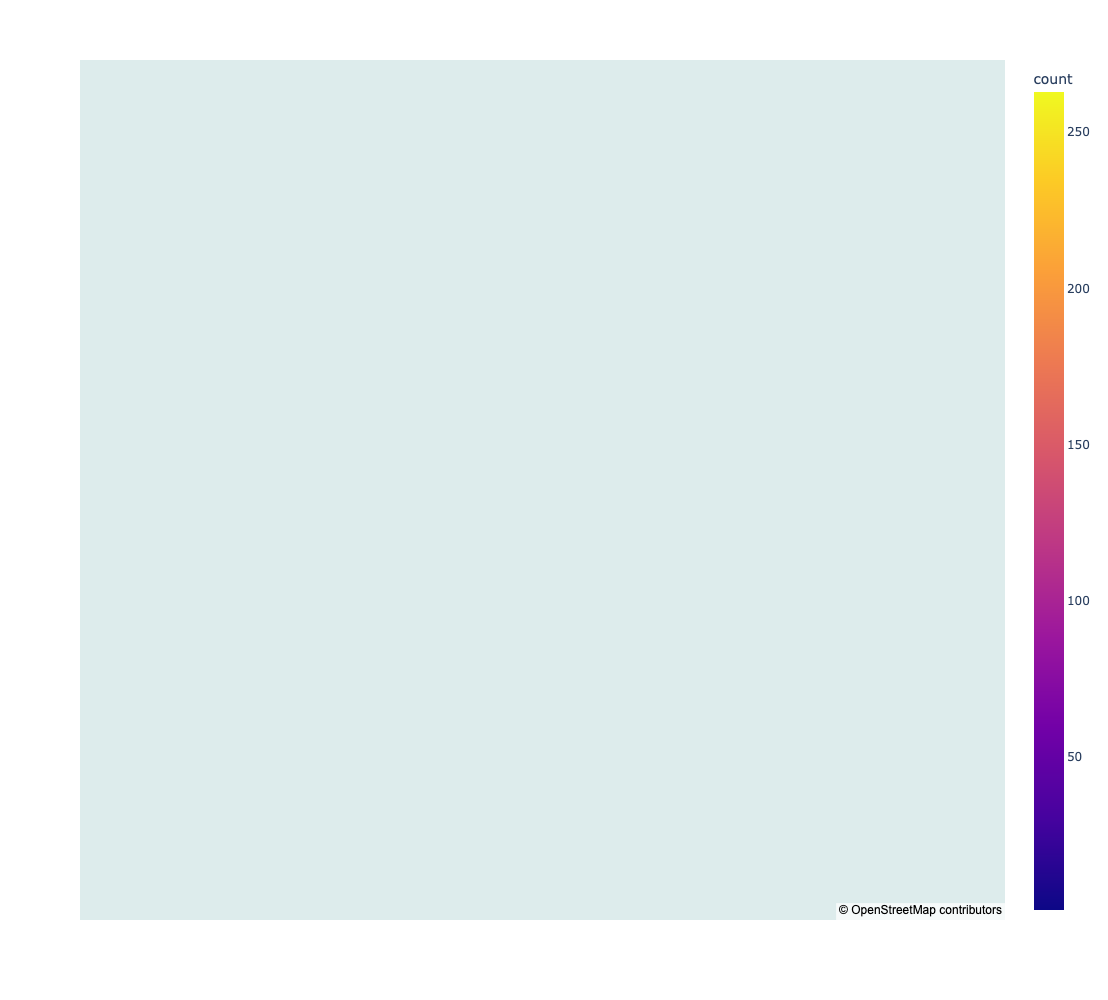

In [284]:
fig = px.density_mapbox(df_villes, lat='lat', lon='lon', z='count', radius=13,
                        center=dict(lat=df_villes.lat[0], lon=df_villes.lon[0]), zoom=5,
                        mapbox_style="open-street-map",width=1200,height=1000)
fig.show()

# APEC

In [2]:
url = "https://www.apec.fr/candidat/recherche-emploi.html/emploi?motsCles=data%20analyst"

## Selenium

### Analyse de la page

In [3]:
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)
data = driver.find_elements(By.CLASS_NAME,'card-offer__text')

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/3494243697.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [7]:
data[0].text

'DATA ANALYST F/H\nMETEOJOB\nA négocier\nNotre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI. Vos missions: - Recueil et extraction de données ; - Nettoyage, retraitement, exploitation voire stockage des données ; - Création de dashboards,...\nCDI\nValence - 26\n28/09/2022'

In [4]:
int(re.findall('([\d]*)',driver.find_element(By.CLASS_NAME,'number-candidat').text)[0])

896

In [13]:
essaie = text[0].text
essaie.split("\n")

['DATA ANALYST F/HMeteojobA négocier Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI.   Vos missions:   - Recueil et extraction de données ; - Nettoyage, retraitement, exploitation voire stockage des données ; - Création de dashboards,...CDI Valence - 26 28/09/2022 ']

In [268]:
liste = driver.find_elements(By.CLASS_NAME,'important-list')

In [269]:
liste[0].text

'CDI\nValence - 26\n28/09/2022'

In [52]:
a = driver.find_elements(By.XPATH,"//div/div/div/a[@href]")
a[0].get_attribute("href")
len(a)

25

In [261]:
apec_dicto = {}
url = "https://www.apec.fr/candidat/recherche-emploi.html/emploi?motsCles=data%20analyst"
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)
data = driver.find_elements(By.CLASS_NAME,'card-offer__text')

a = driver.find_elements(By.XPATH,"//div/div/div/a[@href]")
for i in range(len(data)):
    apec_dicto.update({i:[data[i].text,a[i].get_attribute("href")]})

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/2837679978.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [263]:
df_apec_selenium = pd.DataFrame.from_dict(apec_dicto,orient="index")
df_apec_selenium=df_apec_selenium.rename(columns={0:'bloc_text',1:'link'})
df_apec_selenium.head()

,bloc_text,link
0,DATA ANALYST F/H\nMETEOJOB\nA négocier\nNotre ...,https://www.apec.fr/candidat/recherche-emploi....
1,Data Analyst F/H\nSPRING\nA partir de 30 k€ br...,https://www.apec.fr/candidat/recherche-emploi....
2,DATA ANALYST F/H\nKELLY SERVICES\nA négocier\n...,https://www.apec.fr/candidat/recherche-emploi....
3,Data Analyst F/H\nAID\nA négocier\nAI&Data rec...,https://www.apec.fr/candidat/recherche-emploi....
4,Data Analyst F/H\nGROUPAGORA\n38 - 45 k€ brut ...,https://www.apec.fr/candidat/recherche-emploi....


In [264]:
df_apec_selenium= (df_apec_selenium.merge(df_apec_selenium['bloc_text'].str.split("\n",expand=True),left_index=True,right_index=True).
                   drop(columns=['bloc_text',3])
                   .rename(columns={0:'job',1:'companies',2:'salaires',4:'type_contrat',5:'villes',6:'date_publication'})
                  )

In [267]:
df_apec_selenium.head()

,link,job,companies,salaires,type_contrat,villes,date_publication
0,https://www.apec.fr/candidat/recherche-emploi....,DATA ANALYST F/H,METEOJOB,A négocier,CDI,Valence - 26,28/09/2022
1,https://www.apec.fr/candidat/recherche-emploi....,Data Analyst F/H,SPRING,A partir de 30 k€ brut annuel,CDI,Tours - 37,10/10/2022
2,https://www.apec.fr/candidat/recherche-emploi....,DATA ANALYST F/H,KELLY SERVICES,A négocier,Mission d'intérim,Marcy-l'Étoile - 69,03/10/2022
3,https://www.apec.fr/candidat/recherche-emploi....,Data Analyst F/H,AID,A négocier,CDI,Paris 14 - 75,15/09/2022
4,https://www.apec.fr/candidat/recherche-emploi....,Data Analyst F/H,GROUPAGORA,38 - 45 k€ brut annuel,CDI,Meyzieu - 69,23/09/2022


### Scrapping MultiPages

In [ ]:
elem = driver.find_element(By.XPATH,"//*") 
source_code = elem.get_attribute("outerHTML")
soup = BeautifulSoup(source_code,'html.parser')
data = driver.find_elements(By.CLASS_NAME,'card-offer__text')

In [137]:
number_offre = int(driver.find_element(By.CLASS_NAME,'number-candidat').find_element(By.TAG_NAME,'span').text)
number_offre

871

In [95]:
len(data)

20

In [103]:
print(number_offre//len(data))
print((number_offre//len(data))*len(data))

43
860


In [380]:
metier = "Data analyst"
def collecte_all_page(metier):
    metier = metier.lower().replace(" ","%20")
    url = f"https://www.apec.fr/candidat/recherche-emploi.html/emploi?motsCles={metier}"
    #ouverture du webdriver 
    driver = webdriver.Chrome('../Desktop/chromedriver')
    driver.get(url)
    #gestion du bouton des cookies 
    button=driver.find_element(By.ID,"onetrust-accept-btn-handler")
    button.click()
    time.sleep(0.5)
    # détermination du nombre de boucle 
    number_offre = int(driver.find_element(By.CLASS_NAME,'number-candidat').find_element(By.TAG_NAME,'span').text)
    number_offre_page = len(driver.find_elements(By.CLASS_NAME,'card-offer__text'))
    apec_dicto_multi = {}
    loop = number_offre // number_offre_page
    
    index_dict = 0 # rappel la clé est unique dans un dictionnaire
    for page in range(loop+1):
        data = driver.find_elements(By.CLASS_NAME,'card-offer__text')
        a = driver.find_elements(By.XPATH,"//div/div/div/a[@href]")
        for i in range(len(data)):
            apec_dicto_multi.update({index_dict:[data[i].text,a[i].get_attribute("href")]})
            index_dict+=1
        try:
            element = driver.find_element(By.LINK_TEXT, str(page+1)) #click lien de page 
            element.click()

        except:
            pass
    return apec_dicto_multi

In [381]:

df_apec_selenium_mulit_page = pd.DataFrame.from_dict(collecte_all_page("data_analyst"),orient="index")
df_apec_selenium_mulit_page=df_apec_selenium_mulit_page.rename(columns={0:'bloc_text',1:'link'})
df_apec_selenium_mulit_page= (df_apec_selenium_mulit_page.merge(df_apec_selenium_mulit_page['bloc_text'].str.split("\n",expand=True),left_index=True,right_index=True).
                   drop(columns=['bloc_text',3])
                   .rename(columns={0:'job',1:'companies',2:'salaires',4:'type_contrat',5:'villes',6:'date_publication'})
                  )


/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/1760655501.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [382]:
df_apec_selenium_mulit_page.head()

,link,job,companies,salaires,type_contrat,villes,date_publication
0,https://www.apec.fr/candidat/recherche-emploi....,DATA ANALYST F/H,METEOJOB,A négocier,CDI,Valence - 26,28/09/2022
1,https://www.apec.fr/candidat/recherche-emploi....,Data Analyst F/H,SPRING,A partir de 30 k€ brut annuel,CDI,Tours - 37,10/10/2022
2,https://www.apec.fr/candidat/recherche-emploi....,DATA ANALYST F/H,KELLY SERVICES,A négocier,Mission d'intérim,Marcy-l'Étoile - 69,03/10/2022
3,https://www.apec.fr/candidat/recherche-emploi....,Data Analyst F/H,AID,A négocier,CDI,Paris 14 - 75,15/09/2022
4,https://www.apec.fr/candidat/recherche-emploi....,Data Analyst F/H,GROUPAGORA,38 - 45 k€ brut annuel,CDI,Meyzieu - 69,23/09/2022


### récupération des descriptions

In [388]:
def request_web_driver(url):
    
    driver.get(url)
    #acceptation des cookies 
    try:
        button=driver.find_element(By.ID,"onetrust-accept-btn-handler")
        button.click()
        time.sleep(0.3)
    except:
        pass

    # label -> voir plus -> renvoie d'autres éléments de compétences
    label = driver.find_elements(By.XPATH, "//p/label/span")
    if len(label)>1:
        label[0].click()

        time.sleep(0.3)
        label[1].click()
        time.sleep(0.3)
    else:
        if len(label)>0:
            label = driver.find_element(By.XPATH, "//p/label/span")
            label.click()
        else:
            pass
    return driver



In [ ]:
url = df_apec.link[0]
driver = webdriver.Chrome('../Desktop/chromedriver')
driver = request_web_driver(url)

In [369]:
data = driver.find_elements(By.CLASS_NAME,'details-post')

In [7]:
skills =driver.find_elements(By.CLASS_NAME,'added-skills-language')

In [380]:
print(data[2].find_elements(By.TAG_NAME,'h4')[0].text)
print(data[2].find_elements(By.TAG_NAME,'span')[0].text)

Expérience
Minimum 3 ans


In [381]:
print(data[7].find_elements(By.TAG_NAME,'h4')[0].text)
print(data[7].find_elements(By.TAG_NAME,'p')[0].text)

Descriptif du poste
Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI.

Vos missions:

- Recueil et extraction de données ;
- Nettoyage, retraitement, exploitation voire stockage des données ;
- Création de dashboards, mise en place de KPIs et reporting des performances;
- Mise en place de process/requêtes et automatisations.


In [382]:
print(data[7].find_elements(By.TAG_NAME,'h4')[1].text)
print(data[7].find_elements(By.TAG_NAME,'p')[1].text)

Profil recherché
Vous maitrisez divers outils de traitement et d'analyse de données :
outils de data management + bases de données + data visualisation + langages de programmation (POWER BI [incontournable], SAS, SPSS, SAP, Python, R, VBA, Excel, Access etc.)

Vous êtes passionné(e) pour les chiffres avec des compétences statistiques et une orientation business.

Vous êtes rigoureux, organisé, réactif et d'esprit analytique, curieux et force de proposition
Vous possédez un anglais courant.

Ce poste est le votre ! N'attendez plus et postulez !


In [389]:
print(data[7].find_elements(By.CLASS_NAME,'added-skills-container')[1].text)
print()
print(data[7].find_elements(By.CLASS_NAME,'added-skills-container')[2].text)
print()
print(data[7].find_elements(By.CLASS_NAME,'added-skills-container')[2].find_elements(By.CLASS_NAME,'detail_skills')[0].text) # n'affiche rien avec Sélénium


SAVOIR-ÊTRE
Capacité d'analyse
Curiosité
Force de proposition
Proactivité
Rigueur
Sens de l'organisation
Voir moins

SAVOIR-FAIRE
Analyse de données
Traitement des données
Automatisme
Base de données
Dashboard
Informatique décisionnelle
Langage de programmation
Langage R
Microsoft Access
Microsoft Excel
Nettoyage et propreté
Python
Reporting
SAP
SAS
SPSS
Statistiques
Stockage de produits
Visual Basic for Applications
Voir moins




In [168]:
next_page = driver.find_elements(By.CLASS_NAME,"nextpage")
next_page[0].text

'Offre suivante'

In [265]:
dicto_apec_description = {}
data = driver.find_elements(By.CLASS_NAME,'details-post')
len(data)

8

In [278]:
data[2].find_elements(By.TAG_NAME,'h4')[0].text

'Expérience'

In [358]:

index = 0
colonne = []
texte = []
for i in range(len(data)):
    colonne.append(data[i].find_elements(By.TAG_NAME,'h4')[0].text)
    texte.append(data[i].find_elements(By.TAG_NAME,'span')[0].text)
    
    if i >= 7:
        colonne.append(data[7].find_elements(By.TAG_NAME,'h4')[i-7].text)
        texte.append(data[7].find_elements(By.TAG_NAME,'p')[i-7].text)

In [359]:
colonne

['Salaire',
 'Prise de poste',
 'Expérience',
 'Métier',
 'Statut du poste',
 'Zone de déplacement',
 'Secteur d’activité du poste',
 'Descriptif du poste',
 'Descriptif du poste']

In [360]:
texte

['A négocier',
 'Dès que possible',
 'Minimum 3 ans',
 'Data analyst',
 'Cadre du secteur privé',
 'Pas de déplacement',
 'CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS DE GESTION',
 'LANGUES\nAnglais',
 'Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI.\n\nVos missions:\n\n- Recueil et extraction de données ;\n- Nettoyage, retraitement, exploitation voire stockage des données ;\n- Création de dashboards, mise en place de KPIs et reporting des performances;\n- Mise en place de process/requêtes et automatisations.']

In [21]:
dicto_apec_description = {}
data = driver.find_elements(By.CLASS_NAME,'details-post')
experience = data[2].find_elements(By.TAG_NAME,'span')[0].text
metier = data[3].find_elements(By.TAG_NAME,'span')[0].text
statut = data[4].find_elements(By.TAG_NAME,'span')[0].text
secteur = data[6].find_elements(By.TAG_NAME,'span')[0].text

descriptif_poste = data[7].find_elements(By.TAG_NAME,'p')[0].text
profil_poste = data[7].find_elements(By.TAG_NAME,'p')[1].text
skills =",".join([ i.text for i in data[7].find_elements(By.XPATH,'//div/apec-competence-detail')])

dicto_apec_description.update({1:[experience,metier,statut,secteur,descriptif_poste,profil_poste,skills]})


In [22]:
skills

"Anglais,Capacité d'analyse,Curiosité,Force de proposition,Proactivité,Rigueur,Sens de l'organisation,Analyse de données,Traitement des données,Automatisme,Base de données,Dashboard,Informatique décisionnelle,Langage de programmation,Langage R,Microsoft Access,Microsoft Excel,Nettoyage et propreté,Python,Reporting,SAP,SAS,SPSS,Statistiques,Stockage de produits,Visual Basic for Applications"

In [23]:
profil_poste

"Vous maitrisez divers outils de traitement et d'analyse de données :\noutils de data management + bases de données + data visualisation + langages de programmation (POWER BI [incontournable], SAS, SPSS, SAP, Python, R, VBA, Excel, Access etc.)\n\nVous êtes passionné(e) pour les chiffres avec des compétences statistiques et une orientation business.\n\nVous êtes rigoureux, organisé, réactif et d'esprit analytique, curieux et force de proposition\nVous possédez un anglais courant.\n\nCe poste est le votre ! N'attendez plus et postulez !"

In [24]:
pd.DataFrame.from_dict(dicto_apec_description,orient="index").rename(columns={0:'Experience',1:'Job',2:'Statut',3:'Secteur',4:'descrption_offre',5:'description_profil',6:'skills'})

,Experience,Job,Statut,Secteur,descrption_offre,description_profil,skills
1,Minimum 3 ans,Data analyst,Cadre du secteur privé,CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS D...,Notre client spécialisé dans les systèmes de f...,Vous maitrisez divers outils de traitement et ...,"Anglais,Capacité d'analyse,Curiosité,Force de ..."


In [165]:
df_apec.link.head().values

array(['https://www.apec.fr/candidat/recherche-emploi.html/emploi/detail-offre/169150501W?motsCles=data%20analyst&selectedIndex=0&page=0',
       'https://www.apec.fr/candidat/recherche-emploi.html/emploi/detail-offre/169145954W?motsCles=data%20analyst&selectedIndex=1&page=0',
       'https://www.apec.fr/candidat/recherche-emploi.html/emploi/detail-offre/169072515W?motsCles=data%20analyst&selectedIndex=2&page=0',
       'https://www.apec.fr/candidat/recherche-emploi.html/emploi/detail-offre/169145004W?motsCles=data%20analyst&selectedIndex=3&page=0',
       'https://www.apec.fr/candidat/recherche-emploi.html/emploi/detail-offre/169226853W?motsCles=data%20analyst&selectedIndex=4&page=0'],
      dtype=object)

In [157]:
dicto_apec_description

{1: ['Minimum 2 ans',
  'Data analyst',
  'Cadre du secteur privé',
  'CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES',
  'GroupAgora, acteur global des S.I. depuis 1990 et partenaire informatique de Grands Comptes et PME/PMI partout en France, souhaite renforcer ses équipes en AUVERGNE-RHÔNE-ALPES et recherche 1 Data Analyst.\nLe poste\nUn de nos clients, leader sur son secteur (énergie) recherche actuellement un Data Analyst BI afin de l’intégrer à ses équipes.\nVos différentes missions seront :\nLa mise en place, l’améliorations et la maintenance des rapports POWER BI\nContribuer à la mise en place d’un Data Warehouse\nTravailler avec les équipes métiers pour en comprendre les domaines, contextes afin de contribuer à la proposition de solutions à forts impacts\nLa formation des utilisateurs à l’utilisation des rapports BI en autonomie',
  'Vous connaissez et maitrisez les requêtes et bases SQL.\nVous avez connaissance du développement et de la et maintenance de rapports MS POWER BI\

In [156]:
index=0
for i in data[8].find_elements(By.XPATH,'//div/div/p'):
    if len(i.text)>0:
        print(f'{index} ==> {i.text}')
        index+=1

0 ==> GroupAgora, acteur global des S.I. depuis 1990 et partenaire informatique de Grands Comptes et PME/PMI partout en France, souhaite renforcer ses équipes en AUVERGNE-RHÔNE-ALPES et recherche 1 Data Analyst.
Le poste
Un de nos clients, leader sur son secteur (énergie) recherche actuellement un Data Analyst BI afin de l’intégrer à ses équipes.
Vos différentes missions seront :
La mise en place, l’améliorations et la maintenance des rapports POWER BI
Contribuer à la mise en place d’un Data Warehouse
Travailler avec les équipes métiers pour en comprendre les domaines, contextes afin de contribuer à la proposition de solutions à forts impacts
La formation des utilisateurs à l’utilisation des rapports BI en autonomie
1 ==> Vous connaissez et maitrisez les requêtes et bases SQL.
Vous avez connaissance du développement et de la et maintenance de rapports MS POWER BI
Vous êtes rigoureux, vous aimez le travail en équipe, vous êtes curieux.
Vous êtes réactif, à l’écoute et adaptable
Vous ave

In [158]:
pd.DataFrame.from_dict(dicto_apec_description,orient="index")

,0,1,2,3,4,5,6
1,Minimum 2 ans,Data analyst,Cadre du secteur privé,CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES,"GroupAgora, acteur global des S.I. depuis 1990...",Vous connaissez et maitrisez les requêtes et b...,"Autonomie,Capacité d'adaptation,Curiosité,Espr..."


In [174]:
%%time
dicto_apec_description = {}

count_job = 0
driver = webdriver.Chrome('../Desktop/chromedriver')

for col,values in df_apec.iterrows():
    url = values.link
    companies = values.companies
    driver.get(url)
 
    #acceptation des cookies 
    try:
        button=driver.find_element(By.ID,"onetrust-accept-btn-handler")
        button.click()
        time.sleep(0.3)
    except:
        pass

    # label -> voir plus -> renvoie d'autres éléments de compétences
    label = driver.find_elements(By.XPATH, "//p/label/span")
    if len(label)>1:
        label[0].click()

        time.sleep(0.3)
        label[1].click()
        time.sleep(0.3)
    else:
        if len(label)>0:
            label = driver.find_element(By.XPATH, "//p/label/span")
            label.click()
        else:
            pass
   
    data = driver.find_elements(By.CLASS_NAME,'details-post')
    len_data = len(data)
    if len_data >0: #si l'offre n'existe plus
        experience = data[2].find_elements(By.TAG_NAME,'span')[0].text
        metier = data[3].find_elements(By.TAG_NAME,'span')[0].text
        statut = data[4].find_elements(By.TAG_NAME,'span')[0].text
        secteur = data[6].find_elements(By.TAG_NAME,'span')[0].text
        # le profil et la description du poste sont toujours data - 1 
        # suivant le contenu il pouvait y avoir des écarts entre description et profil 
        # et donc le fonctionnement find_elements(By.TAG_NAME,'p') n'était pas pertinent
        # XPATH permet de remédier au problème incluant une gestion des listes
        # On ne prend pas en compte les espaces vides pour avoir toujours la description du poste en 0 
        # et le profil en 1
        description = []
        for i in data[len_data-1].find_elements(By.XPATH,'//div/div/p'):
            if len(i.text)>0:
                description.append(i.text) 
        descriptif_poste = description[0]
        profil_poste = description[1]
        skills =",".join([ i.text for i in data[len(data)-1].find_elements(By.XPATH,'//div/apec-competence-detail')])
        

        dicto_apec_description.update({count_job:[companies,experience,metier,statut,secteur,descriptif_poste,profil_poste,skills]})
        count_job+=1

    else:
        pass

<timed exec>:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object


CPU times: user 33.4 s, sys: 2.19 s, total: 35.6 s
Wall time: 23min 38s


In [179]:
df_apec_description = (pd.DataFrame.from_dict(dicto_apec_description,orient="index")
                       .rename(columns={0:'companies',1:'experience',2:'jobs',3:'statut',4:'secteur',5:'description_offre',6:'description_profil',7:'skills'})
                      )
df_apec_description

In [181]:
df_apec_description.to_csv("df_apec_description.csv")

## BeautifulSoup

### Scrapping MultiPage 

In [337]:
url = "https://www.apec.fr/candidat/recherche-emploi.html/emploi?motsCles=data%20analyst"
driver = webdriver.Chrome('../Desktop/chromedriver')
driver.get(url)
elem = driver.find_element(By.XPATH,"//*") 
source_code = elem.get_attribute("outerHTML")
soup = BeautifulSoup(source_code,'html.parser')
text=soup.find_all('div',{'class':'card-offer__text'})
div = soup.find_all("div",{'class':'container-result'})

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/2042219226.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [347]:
a= div[0].find_all("a")
link = div[0].find('a',href=True)['href']
link_offre = a[0]['href']
text = a[0].find_all("div",{"class":"card-offer__text"})
a[0]

<a href="/candidat/recherche-emploi.html/emploi/detail-offre/169150501W?motsCles=data%20analyst&amp;selectedIndex=0&amp;page=0" queryparamshandling="merge"><apec-recherche-resultat><div class="card card-offer mb-20 card--clickable"><div class="card-body"><div class="card-offer__header"><div class="card-offer__logo"><figure><!-- --><img alt="Logo société" src="/files/live/mounts/images/media_entreprise/759486/logo_MeteoJob_759486_969844.png"/></figure></div><div class="card-offer__text"><h2 class="card-title fs-16">DATA ANALYST F/H</h2><p class="card-offer__company mb-10">Meteojob</p><ul class="details-offer"><li><img alt="Salaire texte" src="/modules/apec-jahia-module/assets/img/angular/offres/euros.svg"/>A négocier </li></ul><p class="card-offer__description mb-15">Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI.   Vos missions:   - Recueil et extraction de données ; - Nettoyage, retraitement, exploitation v

In [348]:
text

[<div class="card-offer__text"><h2 class="card-title fs-16">DATA ANALYST F/H</h2><p class="card-offer__company mb-10">Meteojob</p><ul class="details-offer"><li><img alt="Salaire texte" src="/modules/apec-jahia-module/assets/img/angular/offres/euros.svg"/>A négocier </li></ul><p class="card-offer__description mb-15">Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI.   Vos missions:   - Recueil et extraction de données ; - Nettoyage, retraitement, exploitation voire stockage des données ; - Création de dashboards,...</p><ul class="details-offer important-list"><li><img alt="type de contrat" src="/modules/apec-jahia-module/assets/img/angular/offres/bag.svg"/>CDI </li><li><img alt="localisation" src="/modules/apec-jahia-module/assets/img/angular/offres/map.svg"/>Valence - 26 </li><li title="Date de publication"><img alt="date de publication" src="/modules/apec-jahia-module/assets/img/angular/offres/watch.svg"/>28/0

In [342]:
link_offre

'/candidat/recherche-emploi.html/emploi/detail-offre/169150501W?motsCles=data%20analyst&selectedIndex=0&page=0'

In [492]:
text = soup.find_all("div",{"class":"card-offer__text"})
len(text)

20

In [493]:
int(soup.find("div",{"class":"number-candidat"}).find('span').text)

861

In [519]:
job = text[0].find('h2',{'class':'card-title'}).text
job

'Data Analyst F/H'

In [465]:
companies = text[0].find('p',{'class':'card-offer__company'}).text
companies

'Meteojob'

In [320]:
description_slice  =text[0].find('p',{'class':'card-offer__description'}).text

'Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI.   Vos missions:   - Recueil et extraction de données ; - Nettoyage, retraitement, exploitation voire stockage des données ; - Création de dashboards,...'

In [349]:
text[0].find_all('li')
liste_type = ['salaire','type_contrat','ville','date']
count = 0
liste_data = {}
for i in liste_type:
    liste_data.update({i:text[0].find_all('li')[count].text})
    count+=1


In [350]:
liste_data

{'salaire': 'A négocier ',
 'type_contrat': 'CDI ',
 'ville': 'Valence - 26 ',
 'date': '28/09/2022 '}

In [383]:
def recup_all_data(metier):
    metier = metier.lower().replace(" ","%20")
    url = f"https://www.apec.fr/candidat/recherche-emploi.html/emploi?motsCles={metier}"
    
    
    driver.get(url)
    button=driver.find_element(By.ID,"onetrust-accept-btn-handler")
    button.click()
    time.sleep(0.3)
    
    elem = driver.find_element(By.XPATH,"//*") 
    source_code = elem.get_attribute("outerHTML")
    soup = BeautifulSoup(source_code,'html.parser')
    text=soup.find_all('div',{'class':'card-offer__text'})
    
    nb_offres = int(soup.find("div",{"class":"number-candidat"}).find('span').text)
    nb_offres_per_pages = int(len(text))
    loop = (nb_offres // nb_offres_per_pages)+1
    emploi = {}
    count_job = 0
    time.sleep(0.3)
    for page in range(1,loop+1):
            
        elem = driver.find_element(By.XPATH,"//*") 
        source_code = elem.get_attribute("outerHTML")
        soup = BeautifulSoup(source_code,'html.parser')
        div = soup.find_all("div",{'class':'container-result'})
        a= div[0].find_all("a")
 
        if len(a)>=20:
            loop = 20
        else:
            loop = len(a)
        for data in range(loop):
            try:
                link_offre = a[data]['href']
                text = a[data].find_all("div",{"class":"card-offer__text"})
                link=f"https://www.apec.fr{link_offre}"
                job = text[0].find('h2',{'class':'card-title'}).text
                companies = text[0].find('p',{'class':'card-offer__company'}).text
                salaire = text[0].find_all('li')[0].text
                type_contrat =text[0].find_all('li')[1].text
                ville=text[0].find_all('li')[2].text
                duree = text[0].find_all('li')[3].text
                emploi.update({count_job:[companies,job,type_contrat,duree,ville,salaire,link,page]})
                count_job+=1

            except:
                pass
            
        try:
            element = driver.find_element(By.LINK_TEXT, str(page+1)) #click lien de page 
            element.click()
            
        except:
            pass

    return emploi


In [352]:
driver = webdriver.Chrome('../Desktop/chromedriver')
dicto_apec = recup_all_data("data analyst")

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/3441410437.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [353]:
df_apec=pd.DataFrame.from_dict(dicto_apec,orient="index").rename(columns={
    0:'companies',
    1:'job',
    2:'type_contrat',
    3:'date',
    4:'villes',
    5:'salaires',
    6:'link'
})


In [355]:
df_apec.to_csv("df_apec.csv")

In [357]:
df_apec.head()

,companies,job,type_contrat,date,villes,salaires,link,7
0,Meteojob,DATA ANALYST F/H,CDI,28/09/2022,Valence - 26,A négocier,https://www.apec.fr/candidat/recherche-emploi....,1
1,SPRING,Data Analyst F/H,CDI,10/10/2022,Tours - 37,A partir de 30 k€ brut annuel,https://www.apec.fr/candidat/recherche-emploi....,1
2,KELLY SERVICES,DATA ANALYST F/H,Mission d'intérim,03/10/2022,Marcy-l'Étoile - 69,A négocier,https://www.apec.fr/candidat/recherche-emploi....,1
3,AID,Data Analyst F/H,CDI,15/09/2022,Paris 14 - 75,A négocier,https://www.apec.fr/candidat/recherche-emploi....,1
4,GROUPAGORA,Data Analyst F/H,CDI,23/09/2022,Meyzieu - 69,38 - 45 k€ brut annuel,https://www.apec.fr/candidat/recherche-emploi....,1


### Récupération des descriptions

In [385]:
def request_url(url):
    driver = request_web_driver(url)
    # récupération du code dans le dom
    elem = driver.find_element(By.XPATH,"//*") 
    source_code = elem.get_attribute("outerHTML")
    # parse avec soup pour exploiter le code source grâce à BS
    soup = BeautifulSoup(source_code,'html.parser')

    return soup

def request_detail_skill(add):
    liste_comp = []
    liste_detail = []
    for i in add:
        comp = i.find_all('div',{'class':'infos_skills'})
        detail = i.find_all('apec-competence-tooltip-niveau',{'class':'detail_skills'})

        for a in comp:
            liste_comp.append(a.text)
        for d in detail:
            liste_detail.append("".join(re.findall("([\d])",d.text)))

    dicto_comp = dict(zip(liste_comp,liste_detail))
    return dicto_comp

In [7]:
df_apec.link[0]

'https://www.apec.fr/candidat/recherche-emploi.html/emploi/detail-offre/169150501W?motsCles=data%20analyst&selectedIndex=0&page=0'

In [384]:
driver = webdriver.Chrome('../Desktop/chromedriver')
soup = request_url(df_apec.link[0])
text=soup.find_all('div',{'class':'details-post'})

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/1955470278.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')
/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/4250969870.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [368]:
experience = text[2].find("span").text
statut = text[4].find("span").text
secteur = text[6].find("span").text
description = text[7].find_all("p")
description_poste = description[0].text
profil = description[1].text
add=soup.find_all('div',{'class':'added-skills-language'})


In [370]:
description[0]

<p>Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI. <br/><br/>Vos missions: <br/><br/>- Recueil et extraction de données ;<br/>- Nettoyage, retraitement, exploitation voire stockage des données ;<br/>- Création de dashboards, mise en place de KPIs et reporting des performances;<br/>- Mise en place de process/requêtes et automatisations.</p>

In [371]:
description[1]

<p>Vous maitrisez divers outils de traitement et d'analyse de données : <br/>outils de data management + bases de données + data visualisation + langages de programmation (POWER BI [incontournable], SAS, SPSS, SAP, Python, R, VBA, Excel, Access etc.)<br/><br/>Vous êtes passionné(e) pour les chiffres avec des compétences statistiques et une orientation business.<br/><br/>Vous êtes rigoureux, organisé, réactif et d'esprit analytique, curieux et force de proposition<br/>Vous possédez un anglais courant. <br/><br/>Ce poste est le votre ! N'attendez plus et postulez ! <br/></p>

In [ ]:
text[7].find_all("div",{'class':'infos_skills'})

[<div class="infos_skills"><p>Anglais</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Analyse de données</p><div class="jauge confirmed"></div></div>,
 <div class="infos_skills"><p>Traitement des données</p><div class="jauge confirmed"></div></div>,
 <div class="infos_skills"><p>Automatisme</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Base de données</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Dashboard</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Informatique décisionnelle</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Langage de programmation</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Langage R</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Microsoft Access</p><div class="jauge beginner"></div></div>,
 <div class="infos_skills"><p>Microsoft Excel</p><div class="jauge beginner"></di

In [109]:
text[7].find_all("h4")

[<h4>Descriptif du poste</h4>,
 <h4>Profil recherché</h4>,
 <h4>Débutant</h4>,
 <h4>Confirmé</h4>,
 <h4>Confirmé</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Débutant</h4>,
 <h4>Entreprise</h4>]

In [103]:
experience

'Minimum 3 ans'

In [104]:
statut

'Cadre du secteur privé'

In [105]:
description_poste

'Notre client spécialisé dans les systèmes de fixation dans le domaine de la construction, recherche un(e) Data Analyst en CDI. Vos missions: - Recueil et extraction de données ;- Nettoyage, retraitement, exploitation voire stockage des données ;- Création de dashboards, mise en place de KPIs et reporting des performances;- Mise en place de process/requêtes et automatisations.'

In [106]:
profil

"Vous maitrisez divers outils de traitement et d'analyse de données : outils de data management + bases de données + data visualisation + langages de programmation (POWER BI [incontournable], SAS, SPSS, SAP, Python, R, VBA, Excel, Access etc.)Vous êtes passionné(e) pour les chiffres avec des compétences statistiques et une orientation business.Vous êtes rigoureux, organisé, réactif et d'esprit analytique, curieux et force de propositionVous possédez un anglais courant. Ce poste est le votre ! N'attendez plus et postulez ! "

In [374]:
request_detail_skill(add)

{'Anglais': '1',
 'Analyse de données': '5',
 'Traitement des données': '5',
 'Automatisme': '1',
 'Base de données': '1',
 'Dashboard': '1',
 'Informatique décisionnelle': '1',
 'Langage de programmation': '1',
 'Langage R': '1',
 'Microsoft Access': '1',
 'Microsoft Excel': '1',
 'Nettoyage et propreté': '1',
 'Python': '1',
 'Reporting': '1',
 'SAP': '1',
 'SAS': '1',
 'SPSS': '1',
 'Statistiques': '1',
 'Stockage de produits': '1',
 'Visual Basic for Applications': '1'}

In [364]:
test_describe_emploi={}
count_job = 0
companies = "test"
soup = request_url(df_apec.link[0])
text=soup.find_all('div',{'class':'details-post'})


description = text[7].find_all("p")
description_poste = description[0].text
profil = description[1].text
experience = text[2].text
statut = text[4].find("span").text
secteur = text[6].find("span").text

add=soup.find_all('div',{'class':'added-skills-language'})
skill = request_detail_skill(add)

test_describe_emploi.update({count_job:[companies,description_poste,profil,experience,statut,secteur,skill]})

/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/4250969870.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [365]:
pd.DataFrame.from_dict(test_describe_emploi,orient="index")

,0,1,2,3,4,5,6
0,test,Notre client spécialisé dans les systèmes de f...,Vous maitrisez divers outils de traitement et ...,ExpérienceMinimum 3 ans,Cadre du secteur privé,CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS D...,"{'Anglais': '1', 'Analyse de données': '5', 'T..."


In [389]:
describe_emploi={}
driver = webdriver.Chrome('../Desktop/chromedriver')
count_job = 0
for col,values in df_apec.iloc[:5,].iterrows():
    url = values.link
    companies = values.companies

    soup = request_url(url)

    text=soup.find_all('div',{'class':'details-post'})
    try:
        if len(text[7].find_all("p"))>0:
            description = text[7].find_all("p")
        else:
            description = text[8].find_all("p")

        description_poste = description[0].text
        profil = description[1].text
    except:
        description_poste=""
        print(url)
        profil=""
    try:
        experience = text[2].text
    except:
        experience = "NaN"
    try:
        statut = text[4].find("span").text
    except:
        statut = "NaN"
    try:
        secteur = text[6].find("span").text
    except:
        secteur = "NaN"
    try:
        add=soup.find_all('div',{'class':'added-skills-language'})
        skill = request_detail_skill(add)
    except:
        skill="NaN"
        
    describe_emploi.update({count_job:[companies,description_poste,profil,experience,statut,secteur,skill]})
    count_job+=1


/var/folders/6d/_c9dj9cs3dv7f9hff54z3xl80000gn/T/ipykernel_1100/3429619308.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../Desktop/chromedriver')


In [390]:
len(describe_emploi)

5

In [391]:
df_complet_apec= pd.DataFrame.from_dict(describe_emploi,orient="index")
df_complet_apec
#df_complet_apec.to_csv('df_complet_apec.csv')

,0,1,2,3,4,5,6
0,Meteojob,Notre client spécialisé dans les systèmes de f...,Vous maitrisez divers outils de traitement et ...,ExpérienceMinimum 3 ans,Cadre du secteur privé,CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS D...,"{'Anglais': '1', 'Analyse de données': '5', 'T..."
1,SPRING,Dans le cadre du développement de notre client...,Dans le cadre du développement de notre client...,ExpérienceMinimum 2 ans,Cadre du secteur privé,ACTIVITÉS DES AGENCES DE TRAVAIL TEMPORAIRE,"{'Analyse de données': '5', 'Algorithme': '1',..."
2,KELLY SERVICES,Vos principales missions :Au sein de la Platef...,Vos principales missions :Au sein de la Platef...,ExpérienceMinimum 2 ans,Cadre du secteur privé,FABRICATION DE PRODUITS PHARMACEUTIQUES DE BASE,"{'Anglais': '1', 'Airflow': '10', 'Automatisme..."
3,AID,AI&Data recherche aujourd'hui des Data Analys...,AI&Data recherche aujourd'hui des Data Analys...,ExpérienceMinimum 2 ans,Cadre du secteur privé,"TRAITEMENT DE DONNÉES, HÉBERGEMENT ET ACTIVITÉ...","{'Algorithme': '1', 'Amazon Web Services': '1'..."
4,GROUPAGORA,"GroupAgora, acteur global des S.I. depuis 1990...","GroupAgora, acteur global des S.I. depuis 1990...",ExpérienceMinimum 2 ans,Cadre du secteur privé,CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES,"{'SQL': '5', 'Actions de formation': '1', 'CRM..."


In [57]:
pd.DataFrame.from_dict(describe_emploi,orient="index").rename(columns={
    0:"companies",
    1:"description_poste",
    2:"profil",
    3:"experience",
    4:"statut",
    5:"secteur",
    6:"skill"
})

,companies,description_poste,profil,experience,statut,secteur,skill
0,Meteojob,Notre client spécialisé dans les systèmes de f...,Vous maitrisez divers outils de traitement et ...,ExpérienceMinimum 3 ans,Cadre du secteur privé,CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS D...,"{'Anglais': '1', 'Analyse de données': '5', 'T..."
1,KELLY SERVICES,Vos principales missions :Au sein de la Platef...,Vos principales missions :Au sein de la Platef...,ExpérienceMinimum 2 ans,Cadre du secteur privé,FABRICATION DE PRODUITS PHARMACEUTIQUES DE BASE,"{'Anglais': '1', 'Airflow': '10', 'Automatisme..."
2,AID,AI&Data recherche aujourd'hui des Data Analys...,AI&Data recherche aujourd'hui des Data Analys...,ExpérienceMinimum 2 ans,Cadre du secteur privé,"TRAITEMENT DE DONNÉES, HÉBERGEMENT ET ACTIVITÉ...","{'Algorithme': '1', 'Amazon Web Services': '1'..."
3,GROUPAGORA,"GroupAgora, acteur global des S.I. depuis 1990...","GroupAgora, acteur global des S.I. depuis 1990...",ExpérienceMinimum 2 ans,Cadre du secteur privé,CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES,"{'SQL': '5', 'Actions de formation': '1', 'CRM..."
4,Meteojob,,,NaN,NaN,NaN,{}


In [56]:
pd.DataFrame.from_dict(dicto_apec_description,orient="index")

,0,1,2,3,4,5,6
0,Minimum 3 ans,Data analyst,Cadre du secteur privé,CONSEIL POUR LES AFFAIRES ET AUTRES CONSEILS D...,Notre client spécialisé dans les systèmes de f...,Vous maitrisez divers outils de traitement et ...,"Anglais,Capacité d'analyse,Curiosité,Force de ..."
1,Minimum 2 ans,Data analyst,Cadre du secteur privé,FABRICATION DE PRODUITS PHARMACEUTIQUES DE BASE,Vos principales missions :\n\nAu sein de la Pl...,Vos principales missions :\n\nAu sein de la Pl...,"Anglais,Airflow,Automatisme,Microsoft Power BI..."
2,Minimum 2 ans,Data analyst,Cadre du secteur privé,"TRAITEMENT DE DONNÉES, HÉBERGEMENT ET ACTIVITÉ...",AI&Data recherche aujourd'hui des Data Analys...,AI&Data recherche aujourd'hui des Data Analys...,"Capacité à prendre des décisions,Capacité d'ad..."
3,Minimum 2 ans,Data analyst,Cadre du secteur privé,CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES,"GroupAgora, acteur global des S.I. depuis 1990...","GroupAgora, acteur global des S.I. depuis 1990...","Autonomie,Capacité d'adaptation,Curiosité,Espr..."
4,Minimum 2 ans,Data analyst,Cadre du secteur privé,CONSEIL EN SYSTÈMES ET LOGICIELS INFORMATIQUES,"GroupAgora, acteur global des S.I. depuis 1990...","GroupAgora, acteur global des S.I. depuis 1990...","Autonomie,Capacité d'adaptation,Curiosité,Espr..."


In [34]:
driver.quit()